In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

MAX_EVENT_DISPLAY = 15 # custom number of neighbors to display
TEAM_NODE_A = 1740 # home team node to focus on and see neighbors of
TEAM_NODE_B = 1455 # away team node to focus on and see neighbors of
FIG_SIZE = 10 # graph display size

In [183]:
df = pd.read_csv('data/processed/lol/events.csv')

In [434]:
focusNodes = [
    {
        'name': TEAM_NODE_A,
        'nodeList': [],
        'edgeList': []
    },
    {
        'name': TEAM_NODE_B,
        'nodeList': [],
        'edgeList': []
    }
]


for focusNode in focusNodes:
    selectedTeam = df.loc[df['u'] == focusNode['name'], ['u', 'v', 'u_type', 'v_type', 'e_type']].head(MAX_EVENT_DISPLAY)
    teamTypeDF = selectedTeam.drop_duplicates()
    us = list(teamTypeDF[['u', 'u_type']].itertuples(index=False, name=None))
    vs = list(teamTypeDF[['v', 'v_type']].itertuples(index=False, name=None))
    nodesList = list(list(dict.fromkeys(us + vs)))
    nodesList = list(map(lambda x: (x[0], {'type': x[1]}), nodesList))
    edgesWithDups = selectedTeam.groupby(selectedTeam.columns.tolist(), as_index=False).size()
    edgesWithDupsList = list(edgesWithDups[['u', 'v', 'e_type', 'size']].itertuples(index=False, name=None))
    # Change arrow display direction if edge type is 3 (to show player joining team):
    edgesWithDupsList = list(map(lambda x: (x[1] if x[2] == 3 else x[0], x[0] if x[2] == 3 else x[1], { 
        'edge_type': x[2], 
        'weight': x[3]
        }), edgesWithDupsList))
    focusNode['nodeList'] = nodesList
    focusNode['edgeList'] = edgesWithDupsList
    print('============')
    print(focusNode['name'])
    print(focusNode['nodeList'])
    for edgeMe in focusNode['edgeList']:
        if (edgeMe[0] in [1740, 1455] and edgeMe[1] in [1740, 1455]):
            print(edgeMe)

1740
[(1740, {'type': 1}), (2627, {'type': 2}), (5002, {'type': 2}), (6746, {'type': 2}), (9932, {'type': 2}), (3493, {'type': 2}), (1455, {'type': 1})]
(1740, 1455, {'edge_type': 1, 'weight': 1})
(1740, 1455, {'edge_type': 4, 'weight': 1})
1455
[(1455, {'type': 1}), (9252, {'type': 2}), (2572, {'type': 2}), (4850, {'type': 2}), (10240, {'type': 2}), (5179, {'type': 2}), (7240, {'type': 2}), (6830, {'type': 2}), (10080, {'type': 2}), (4600, {'type': 2}), (9362, {'type': 2}), (1627, {'type': 1})]


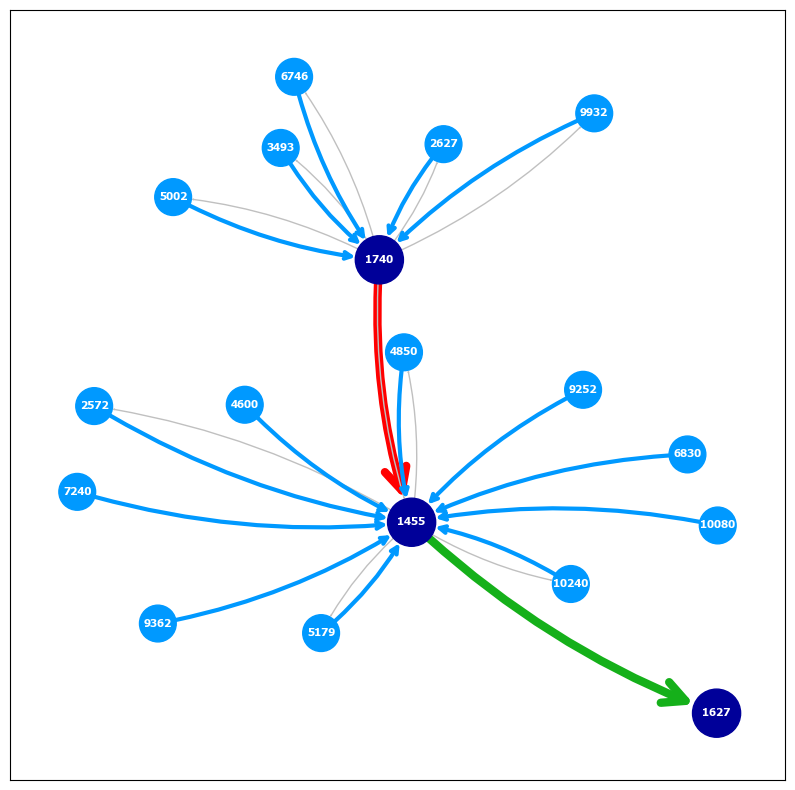

In [438]:
focusGraph = nx.MultiDiGraph()

# Keys the same as node type
# (1) team
# (2) player
nodeSizeMapper = {
    1: 1200,
    2: 700
}

nodeColorMapper = {
    1: '#000099',
    2: '#0099FF'
}

# Keys the same as edge_type
# (1) Lost
# (2) Won
# (3) Played
# (4) Game info
edgeColorMapper = {
    1: '#FF0000',
    2: '#15B01A',
    3: '#0099FF',
    4: '#C0C0C0'
}

lineWidthMapper = {
    1: 6,
    2: 6,
    3: 3,
    4: 1
}

arrowSizeMapper = {
    1: 40,
    2: 40,
    3: 12,
    4: 1
}

allNodesList = focusNodes[0]['nodeList'] + focusNodes[1]['nodeList']
allEdgesList = focusNodes[0]['edgeList'] + focusNodes[1]['edgeList']

focusGraph.add_nodes_from(allNodesList)
focusGraph.add_edges_from(allEdgesList)

options = {
    'arrowstyle': '->',
    'arrowsize': list(arrowSizeMapper[edge_type] for u, v, edge_type in list(focusGraph.edges(data='edge_type')))
}

fig = plt.figure(figsize=(FIG_SIZE, FIG_SIZE))
pos = nx.spring_layout(focusGraph)

nx.draw_networkx(
    focusGraph,
    pos=pos,
    connectionstyle='arc3, rad = 0.1',
    arrows=True,
    **options,
    with_labels=True,
    node_color=list(nodeColorMapper[type] for u, type in list(focusGraph.nodes(data='type'))),
    edge_color=list(edgeColorMapper[edge_type] for u, v, edge_type in list(focusGraph.edges(data='edge_type'))),
    node_size=list(nodeSizeMapper[type] for u, type in list(focusGraph.nodes(data='type'))),
    font_color="white",
    font_size=8,
    font_family="Tahoma",
    font_weight="bold",
    width=list(lineWidthMapper[edge_type] for u, v, edge_type in list(focusGraph.edges(data='edge_type')))
)

# To add an invidual/multiple edges separately:
# nx.draw_networkx_edges(
#     focusGraph, 
#     pos, 
#     arrows=True,
#     connectionstyle='arc3, rad = 0.1',
#     edgelist=[(1455, 1740)], 
#     width=3)

# plt.margins(0.2)
plt.show()